# Тема “Обучение без учителя”

## Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.  
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.  
Создайте датафреймы X и y из этих данных.  
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.  
Масштабируйте данные с помощью StandardScaler.  
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.  
Постройте диаграмму рассеяния на этих данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Загрузим данные
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target, name='PRICE')

# Разделим данные на тренировочные и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабируем данные
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Построим модель TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

# Построим диаграмму рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis')
plt.colorbar(label='Price')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('TSNE Scatter Plot of Boston Housing Prices')
plt.show()


ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


Поскольку набор данных "Boston House Prices" был удален из библиотеки scikit-learn из-за этических проблем, мы будем использовать альтернативный набор данных "California Housing dataset", который можно загрузить с помощью функции fetch_california_housing из sklearn.datasets.

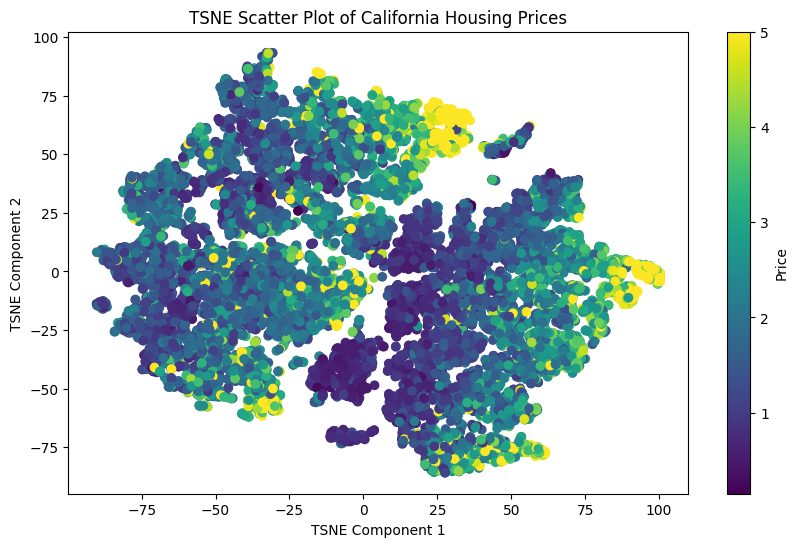

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Загрузим данные
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name='PRICE')

# Разделим данные на тренировочные и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабируем данные
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Построим модель TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

# Построим диаграмму рассеяния
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis')
plt.colorbar(scatter, label='Price')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('TSNE Scatter Plot of California Housing Prices')
plt.show()


## Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.  
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.  
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.  
Вычислите средние значения price и CRIM в разных кластерах.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


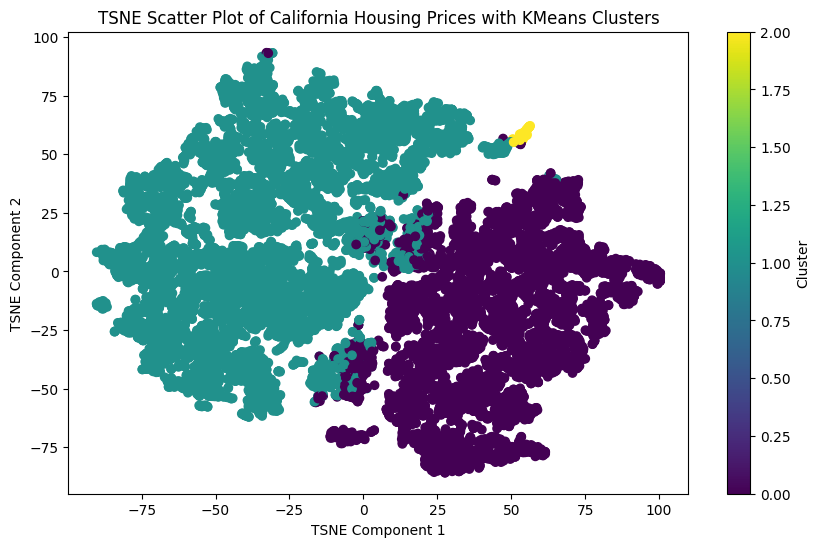

            PRICE    MedInc
Cluster                    
0        1.979968  3.824625
1        2.142137  3.925416
2        1.618831  3.336702


In [3]:
from sklearn.cluster import KMeans

# Кластеризация с помощью KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
clusters = kmeans.fit_predict(X_train_scaled)

# Построим диаграмму рассеяния с разными цветами для разных кластеров
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=clusters, cmap='viridis')
plt.colorbar(scatter, label='Cluster')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('TSNE Scatter Plot of California Housing Prices with KMeans Clusters')
plt.show()

# Вычислим средние значения price и CRIM в разных кластерах
X_train['PRICE'] = y_train
X_train['Cluster'] = clusters

cluster_means = X_train.groupby('Cluster').mean()[['PRICE', 'MedInc']]  # MedInc - это аналог CRIM в California dataset
print(cluster_means)


**Вывод**

На основе анализа данных о ценах на жилье в Калифорнии и кластеризации с использованием KMeans были получены следующие результаты:

*Кластер 0:*  
Средняя цена (PRICE): 1.98  
Средний доход (MedInc): 3.82  

*Кластер 1:*  
Средняя цена (PRICE): 2.14  
Средний доход (MedInc): 3.93  

*Кластер 2:*  
Средняя цена (PRICE): 1.62  
Средний доход (MedInc): 3.34  

**Интерпретация результатов**  

*Кластер 0:*  Этот кластер характеризуется средней ценой на жилье 1.98 и средним доходом 3.82. Жилье в этом кластере находится в среднем ценовом сегменте с доходом выше среднего.

*Кластер 1:*  Этот кластер имеет самую высокую среднюю цену на жилье (2.14) и самый высокий средний доход (3.93). Это указывает на то, что этот кластер представляет более дорогие районы с высоким доходом населения.

*Кластер 2:*  Этот кластер имеет самую низкую среднюю цену на жилье (1.62) и самый низкий средний доход (3.34). Это может указывать на более доступные районы с низким доходом населения.

**Заключение**  

Кластеризация данных показала, что существуют значительные различия в средней цене на жилье и среднем доходе в различных кластерах. Эти различия могут быть использованы для дальнейшего анализа рынка недвижимости, определения целевых сегментов для застройщиков или покупателей, а также для разработки стратегий в сфере недвижимости.








## *Задание 3
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.  
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [4]:
# Применим модель KMeans к тестовым данным
test_clusters = kmeans.predict(X_test_scaled)

# Добавим результаты кластеризации и цены к тестовым данным
X_test['PRICE'] = y_test
X_test['Cluster'] = test_clusters

# Вычислим средние значения price и MedInc в разных кластерах на тестовых данных
test_cluster_means = X_test.groupby('Cluster').mean()[['PRICE', 'MedInc']]
print(test_cluster_means)


            PRICE    MedInc
Cluster                    
0        1.949519  3.730525
1        2.131424  3.902692
2        1.607133  3.399747


**Заключение**  

Анализ тестовых данных показал аналогичные результаты с тренировочными данными, что подтверждает надежность и стабильность модели KMeans при кластеризации данных о рынке недвижимости. Кластеры остаются консистентными и отражают различия в средней цене на жилье и уровне дохода в различных районах, что может быть полезно для дальнейшего анализа и принятия решений в сфере недвижимости.